# 1. 설치 현황, 전기차 충전소 정보

**패키지 설치 및 로드하기**

In [1]:
import csv
import pandas as pd
import folium


**데이터 프레임변환**

In [3]:
df_isnull = pd.read_csv('/content/전기자동차_위도경도(수정).csv',  encoding = 'cp949') 
df = df_isnull.dropna(how='any', axis = 0)

**데이터 검토하기**

In [4]:
print(df)

        시도         충전소명         위도          경도
0      강원도     강릉더샵 아파트  37.750646  128.909940
1      강원도       강릉특별지사  37.782175  128.918810
2      강원도       그린내하우스  37.760830  128.918984
3      강원도       봉평면사무소  37.616188  128.379730
4      강원도     강원도교육연수원  37.786442  128.918339
..     ...          ...        ...         ...
438  서울특별시    구로성호메이플라워  37.496904  126.891384
439  서울특별시  고척LIG리가 아파트  37.505698  126.861506
440  서울특별시  구로4동 주택가 공동  37.489516  126.886898
441  서울특별시      구로삼성래미안  37.487507  126.892029
442  서울특별시      동아한신아파트  37.500949  126.865399

[443 rows x 4 columns]


**지도 생성**

In [5]:
smap = folium.Map(location=[36.437795 , 127.423688],titles="Stamen Terrian", zoom_start=8)

**생성된 지도에 마크표시**

In [6]:
for name, lat, lng in zip(df.충전소명, df.위도, df.경도) :
  folium.Marker([lat, lng], popup=name).add_to(smap)
smap

#2. 지역별 전기자동차 현황 

**패키지 설치 및 로드하기**

In [42]:
import pandas as pd
import folium

**데이터 프레임 변환**

In [44]:
df=pd.read_csv('/content/서울전기차대수.csv', encoding='cp949')#utf8 , cp949

**데이터 출력**

In [46]:
print(df)

       기준일ID  시군구코드  시군구명  인구수   전기차수
0   20221105  11110   종로구  299    571
1   20221105  11170   용산구  296    187
2   20221105  11305   강북구  292    881
3   20221105  11380   은평구  438   1349
4   20221105  11410  서대문구  368    348
5   20221105  11470   양천구  372   1085
6   20221105  11680   강남구  769  10954
7   20221105  11140    중구  268    267
8   20221105  11200   성동구  346    242
9   20221105  11215   광진구  385    389
10  20221105  11230  동대문구  368    127
11  20221105  11260   중랑구  355    345
12  20221105  11290   성북구  431    207
13  20221105  11320   도봉구  272    243
14  20221105  11350   노원구  496    259
15  20221105  11440   마포구  480    407
16  20221105  11470   양천구  372    311
17  20221105  11500   강서구  541    228
18  20221105  11530   구로구  412    352
19  20221105  11545   금천구  214    157
20  20221105  11560  영등포구  485    307
21  20221105  11590   동작구  396    204
22  20221105  11620   관악구  488    148
23  20221105  11650   서초구  531   3152
24  20221105  11710   송파구  746    208
25  20221105

**패키지 설치 및 로드하기**

In [ ]:
import requests
import json
import re

**서울 행정 구역 json**

In [ ]:
s_geo='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

**지도 불러오기**

In [ ]:
s_map = folium.Map(location=[37.559984,126.9753071],
                   tiles='Stamen Terrain', zoom_start=11)

**지도**

In [ ]:

folium.Choropleth(geo_data=s_geo, data=df, columns=['시군구명', '전기차수'], 
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3, 
                  threshold_scale=[0, 250, 500, 1000, 1500, 2000, 3000, 40000], 
                  key_on='feature.properties.name').add_to(s_map)

s_map

#3. 지역별 전기자동차 증가

**폰트설치**

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

**한글 폰트 설치**

In [2]:
import matplotlib.font_manager as fm
fm._rebuild()

import matplotlib.pyplot as plt
plt.rc('font',family="NanumGothic")

**CSV 파일 업로드**

In [29]:
from google.colab import files
import pandas as pd
import seaborn as sns
loaded = files.upload()
df=pd.read_csv('지역별충전소정보.csv',encoding='949')
print(df)

Saving 연도별전기차증가.csv to 연도별전기차증가 (1).csv
     연도  강원도  경기도  경상남도  경상북도  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  세종특별시  \
0  2016    5   22    24     8      3      4      3      6     28      1   
1  2017  118  572   199   127     52    181     86     97    444     48   
2  2018  140  631   235   175     74    205     98    118    518     61   
3  2019  165  699   255   190     85    227    105    124    546     61   
4  2020  185  760   362   258    100    242    115    133    584     64   
5  2021  202  805   370   264    102    248    120    145    605     64   

   울산광역시  인천광역시  전라남도  전라북도  제주특별시  충청남도  충청북도  
0      4      3    19     9      7     5    13  
1     38    117   125   109    155    73   125  
2     42    129   149   130    185    95   145  
3     45    137   169   147    202   109   162  
4     48    153   181   165    202   144   186  
5     50    164   195   180    223   169   189  


**index_col을 연도별로 설정**

In [30]:
df=pd.read_csv('지역별충전소정보.csv',encoding='949',index_col='연도')
print(df)


      강원도  경기도  경상남도  경상북도  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  세종특별시  울산광역시  \
연도                                                                            
2016    5   22    24     8      3      4      3      6     28      1      4   
2017  118  572   199   127     52    181     86     97    444     48     38   
2018  140  631   235   175     74    205     98    118    518     61     42   
2019  165  699   255   190     85    227    105    124    546     61     45   
2020  185  760   362   258    100    242    115    133    584     64     48   
2021  202  805   370   264    102    248    120    145    605     64     50   

      인천광역시  전라남도  전라북도  제주특별시  충청남도  충청북도  
연도                                          
2016      3    19     9      7     5    13  
2017    117   125   109    155    73   125  
2018    129   149   130    185    95   145  
2019    137   169   147    202   109   162  
2020    153   181   165    202   144   186  
2021    164   195   180    223   169   189  


**연도별 증가 그래프**

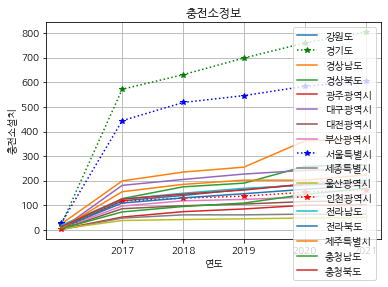

In [31]:
car_plot = df.plot(grid=True, style = ['','g:*','','','','','','','b:*','','','r:*','','','','','']
)
car_plot.set_xticks([2017,2018,2019,2020,2021])
car_plot.set_xlabel('연도')
car_plot.set_ylabel('충전소설치')
car_plot.set_title('충전소정보')

plt.show()


**연도별 전기차량 증가**

In [32]:
from google.colab import files
import pandas as pd
loaded = files.upload()
df=pd.read_csv('연도별전기차증가.csv',encoding='949')
print(df)

Saving 연도별전기차증가.csv to 연도별전기차증가 (2).csv
    기준일     서울     인천     경기    강원    충북     충남    대전    세종     경북     대구  \
0  2019  14952   2598  11750  2445  2412   2841  2555   903   4051  11313   
1  2020  23393   5366  20477  4078  3883   5489  4469  1148   7051  12630   
2  2021  40564  12820  39958  7946  8194   9991  7701  1859  11240  16185   
3  2022  43206  14134  45891  8652  9683  11532  8595  2069  12318  17584   

     전북    전남    광주     경남     부산    울산     제주      합계  
0  1841  3326  2464   3626   3216  1447  18178   89918  
1  3323  5223  3210   6308   5355  2274  21285  134962  
2  7365  8708  5194  12606  12375  3166  25571  231443  
3  8404  9978  6015  14371  15330  3789  26702  258253  


**index_col을 기준일로 설정**

In [33]:
df=pd.read_csv('연도별전기차증가.csv',encoding='949',index_col='기준일')
print(df)


         서울     인천     경기    강원    충북     충남    대전    세종     경북     대구    전북  \
기준일                                                                            
2019  14952   2598  11750  2445  2412   2841  2555   903   4051  11313  1841   
2020  23393   5366  20477  4078  3883   5489  4469  1148   7051  12630  3323   
2021  40564  12820  39958  7946  8194   9991  7701  1859  11240  16185  7365   
2022  43206  14134  45891  8652  9683  11532  8595  2069  12318  17584  8404   

        전남    광주     경남     부산    울산     제주      합계  
기준일                                                  
2019  3326  2464   3626   3216  1447  18178   89918  
2020  5223  3210   6308   5355  2274  21285  134962  
2021  8708  5194  12606  12375  3166  25571  231443  
2022  9978  6015  14371  15330  3789  26702  258253  


**연도별 전기차 증가 그래프**

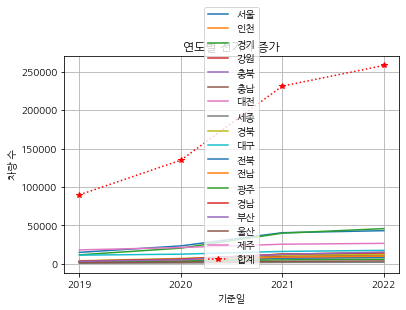

In [41]:
car_plot = df.plot(grid=True, style = ['','','','','','','','','','','','','','','','','','r:*'])

car_plot.set_xticks([2019,2020,2021,2022])
car_plot.set_xlabel('기준일')
car_plot.set_ylabel('차량 수')
car_plot.set_title('연도별 전기차 증가')

plt.show()